In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import seaborn as sns

In [2]:
sales = pd.read_csv('C:/Users/rayha/Downloads/sales_data.csv')
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
sales.duplicated().sum()

0

In [5]:
sales.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [6]:
sales.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16598.000000,16598,16598,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.416134,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.781686,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


In [7]:
corelation = sales.corr(numeric_only=True)
print(corelation)

                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.177526 -0.401362 -0.379123 -0.267785    -0.332986   
Year          0.177526  1.000000 -0.091282  0.005824 -0.169432     0.040857   
NA_Sales     -0.401362 -0.091282  1.000000  0.767727  0.449787     0.634737   
EU_Sales     -0.379123  0.005824  0.767727  1.000000  0.435584     0.726385   
JP_Sales     -0.267785 -0.169432  0.449787  0.435584  1.000000     0.290186   
Other_Sales  -0.332986  0.040857  0.634737  0.726385  0.290186     1.000000   
Global_Sales -0.427407 -0.074807  0.941047  0.902836  0.611816     0.748331   

              Global_Sales  
Rank             -0.427407  
Year             -0.074807  
NA_Sales          0.941047  
EU_Sales          0.902836  
JP_Sales          0.611816  
Other_Sales       0.748331  
Global_Sales      1.000000  


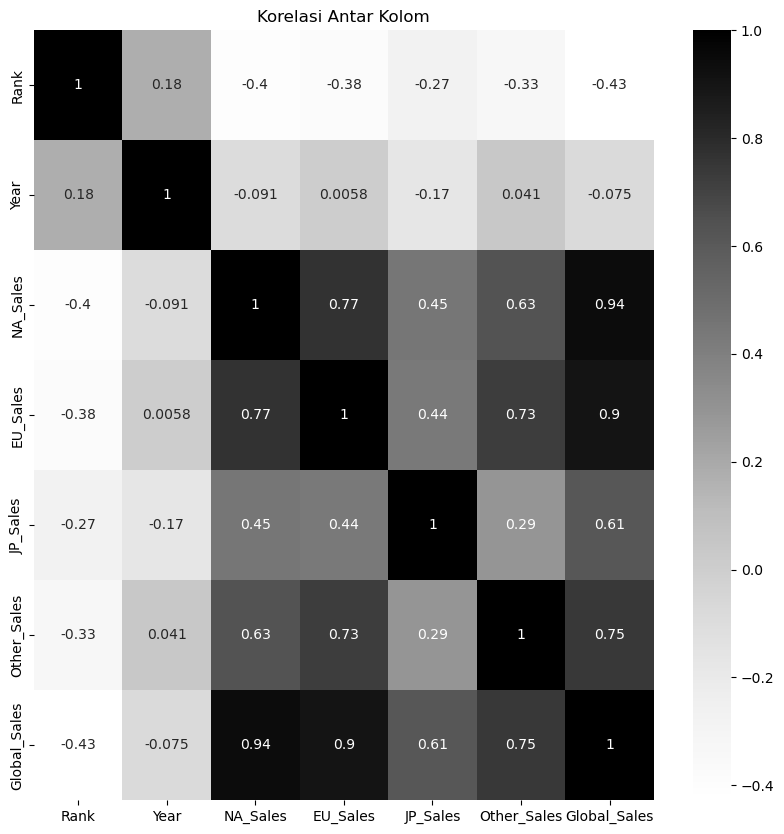

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(corelation, annot=True, cmap="Greys")
plt.title("Korelasi Antar Kolom")
plt.show()

In [9]:
sales = sales.drop(['Rank', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'NA_Sales'], axis=1)
sales.head()

,Name,Platform,Year,Genre,Publisher,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37


In [10]:
print(sales['Platform'].nunique())
print(sales['Genre'].nunique())
print(sales['Publisher'].nunique())

31
12
578


In [11]:
sales_by_platform = sales.groupby('Platform')
sales_by_platform = sales_by_platform.agg({'Global_Sales': sum})
sales_by_platform = sales_by_platform.sort_values('Global_Sales', ascending=False)
print(sales_by_platform)
top_10_platform = sales_by_platform.sort_values(by ='Global_Sales', ascending=False).head(10)

          Global_Sales
Platform              
PS2            1255.64
X360            979.96
PS3             957.84
Wii             926.71
DS              822.49
PS              730.66
GBA             318.50
PSP             296.28
PS4             278.10
PC              258.82
XB              258.26
GB              255.45
NES             251.07
3DS             247.46
N64             218.88
SNES            200.05
GC              199.36
XOne            141.06
2600             97.08
WiiU             81.86
PSV              61.93
SAT              33.59
GEN              28.36
DC               15.97
SCD               1.87
NG                1.44
WS                1.42
TG16              0.16
3DO               0.10
GG                0.04
PCFX              0.03


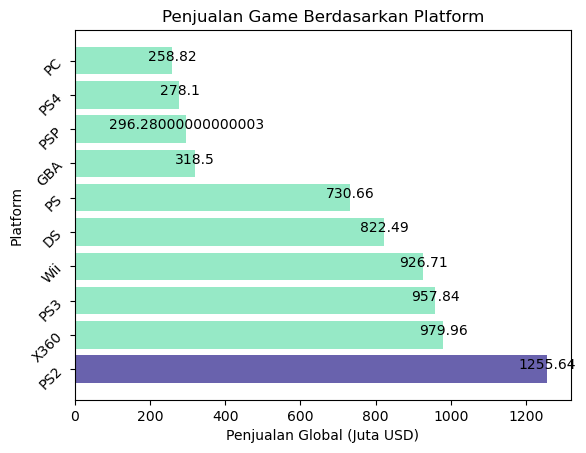

In [12]:
# Buat chart
plt.barh(top_10_platform.index, top_10_platform['Global_Sales'], color=['#6962AD', '#96E9C6', '#96E9C6',
                                                          '#96E9C6', '#96E9C6', '#96E9C6',
                                                          '#96E9C6', '#96E9C6', '#96E9C6',
                                                          '#96E9C6'])

# Tampilkan angka pasti dari bar chart
for i in range(len(top_10_platform)):
    plt.text(top_10_platform['Global_Sales'].iloc[i] + 0.5, i, top_10_platform['Global_Sales'].iloc[i], ha='center')

# Tambahkan judul, label sumbu, dan lainnya
plt.title('Penjualan Game Berdasarkan Platform')
plt.xlabel('Penjualan Global (Juta USD)')
plt.ylabel('Platform')
plt.yticks(rotation=45)

# Tampilkan chart
plt.show()

In [13]:
sales_by_publisher = sales.groupby('Publisher')
sales_by_publisher = sales_by_publisher.agg({'Global_Sales': sum})
sales_by_publisher = sales_by_publisher.sort_values('Global_Sales', ascending=False)
print(sales_by_publisher)
top_10_publisher = sales_by_publisher.sort_values('Global_Sales', ascending=False).head(10)

                             Global_Sales
Publisher                                
Nintendo                          1786.56
Electronic Arts                   1110.32
Activision                         727.46
Sony Computer Entertainment        607.50
Ubisoft                            474.72
...                                   ...
Ongakukan                            0.01
Commseed                             0.01
Takuyo                               0.01
Boost On                             0.01
Naxat Soft                           0.01

[578 rows x 1 columns]


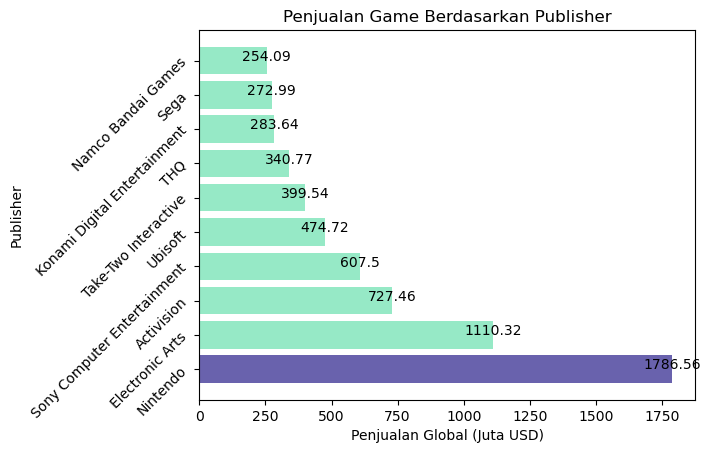

In [14]:
# Buat chart
plt.barh(top_10_publisher.index, top_10_publisher['Global_Sales'], color=['#6962AD', '#96E9C6', '#96E9C6',
                                                          '#96E9C6', '#96E9C6', '#96E9C6',
                                                          '#96E9C6', '#96E9C6', '#96E9C6',
                                                          '#96E9C6'])

# Tampilkan angka pasti dari bar chart
for i in range(len(top_10_publisher)):
    plt.text(top_10_publisher['Global_Sales'].iloc[i] + 0.5, i, top_10_publisher['Global_Sales'].iloc[i], ha='center')

# Tambahkan judul, label sumbu, dan lainnya
plt.title('Penjualan Game Berdasarkan Publisher')
plt.xlabel('Penjualan Global (Juta USD)')
plt.ylabel('Publisher')
plt.yticks(rotation=45)

# Tampilkan chart
plt.show()

In [15]:
sales_by_genre = sales.groupby('Genre')
sales_by_genre = sales_by_genre.agg({'Global_Sales': sum})
sales_by_genre = sales_by_genre.sort_values('Global_Sales', ascending=False)
print(sales_by_genre)

              Global_Sales
Genre                     
Action             1751.18
Sports             1330.93
Shooter            1037.37
Role-Playing        927.37
Platform            831.37
Misc                809.96
Racing              732.04
Fighting            448.91
Simulation          392.20
Puzzle              244.95
Adventure           239.04
Strategy            175.12


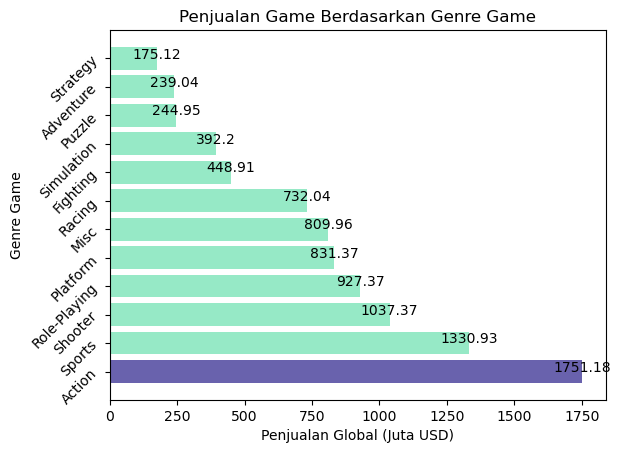

In [16]:
# Buat chart
plt.barh(sales_by_genre.index, sales_by_genre['Global_Sales'], color=['#6962AD', '#96E9C6', '#96E9C6',
                                                          '#96E9C6', '#96E9C6', '#96E9C6',
                                                          '#96E9C6', '#96E9C6', '#96E9C6',
                                                          '#96E9C6', '#96E9C6', '#96E9C6'])

# Tampilkan angka pasti dari bar chart
for i in range(len(sales_by_genre)):
    plt.text(sales_by_genre['Global_Sales'].iloc[i] + 0.5, i, sales_by_genre['Global_Sales'].iloc[i], ha='center')

# Tambahkan judul, label sumbu, dan lainnya
plt.title('Penjualan Game Berdasarkan Genre Game')
plt.xlabel('Penjualan Global (Juta USD)')
plt.ylabel('Genre Game')
plt.yticks(rotation=45)

# Tampilkan chart
plt.show()

In [17]:
sales_by_year = sales.groupby('Year')
sales_by_year = sales_by_year.agg({'Global_Sales': sum})
sales_by_year = sales_by_year.sort_values('Year', ascending=True)
print(sales_by_year)
top_10_year = sales_by_year.sort_values('Global_Sales', ascending=False).head(10)

        Global_Sales
Year                
1980.0         11.38
1981.0         35.77
1982.0         28.86
1983.0         16.79
1984.0         50.36
1985.0         53.94
1986.0         37.07
1987.0         21.74
1988.0         47.22
1989.0         73.45
1990.0         49.39
1991.0         32.23
1992.0         76.16
1993.0         45.98
1994.0         79.17
1995.0         88.11
1996.0        199.15
1997.0        200.98
1998.0        256.47
1999.0        251.27
2000.0        201.56
2001.0        331.47
2002.0        395.52
2003.0        357.85
2004.0        419.31
2005.0        459.94
2006.0        521.04
2007.0        711.21
2008.0        678.90
2009.0        667.30
2010.0        600.45
2011.0        515.99
2012.0        363.54
2013.0        368.11
2014.0        337.05
2015.0        264.44
2016.0         70.93
2017.0          0.05
2020.0          0.29


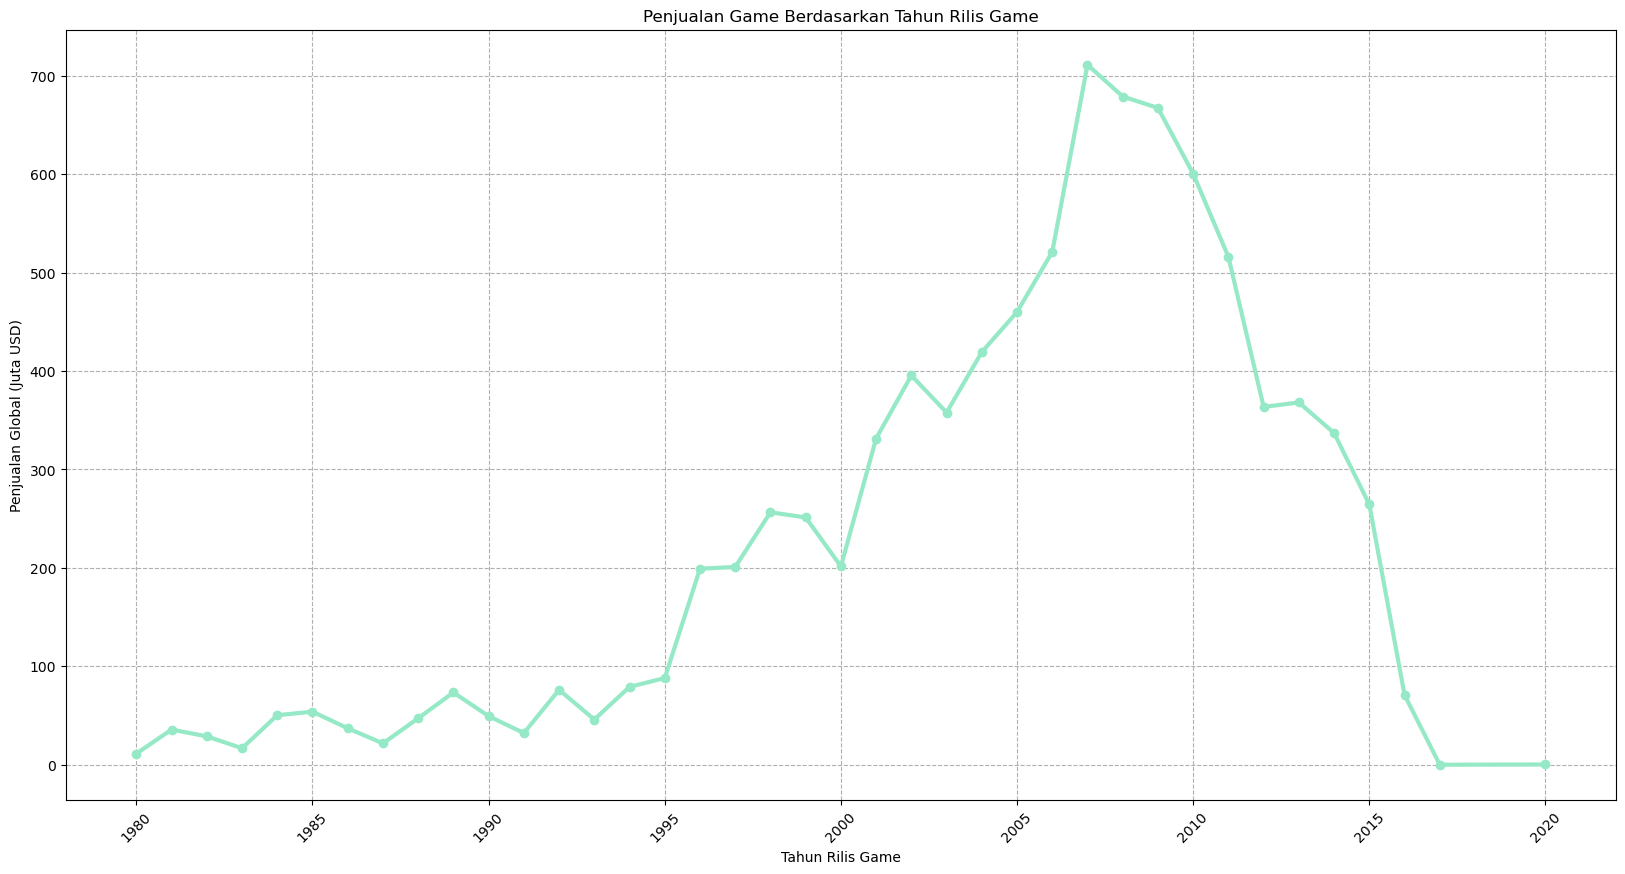

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(sales_by_year.index, sales_by_year['Global_Sales'], 
         marker='o', color='#96E9C6', linewidth=3)
plt.grid(True, linestyle='--')
plt.title('Penjualan Game Berdasarkan Tahun Rilis Game')
plt.xlabel('Tahun Rilis Game')
plt.ylabel('Penjualan Global (Juta USD)')
plt.xticks(rotation=45)
plt.show()